In [839]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [840]:
# load the dataset 
df = pd.read_csv("prepared_data.csv")

In [841]:

df.drop('Unnamed: 0',axis=1,inplace=True) # drop the unnamed column
df.head()

,Target,fblk,nblk,anchor_exact_keyword,anchor_keyword,pa_score,ref_dom,outb_dom,mon_visits,keywords_ranked_on,cwvm,cwvd,mf,ssl,si,Tlen,Tkw,Mlen,Mkw,h1,h1len,h1kw,h2,h2len,h2kw,h3,h3len,h3kw,alt,altkw,linkin,linkout,urllen,urlkw,txtlen,txtkw,domain_age
0,0,466,957,451,948,79,403,10,1.600000e+07,5000000,51.0,94.0,1,1,2,43,1,138,1,1,13,1,8,25,6,1,52.0,0,5,1,136,14,90,1,2175,55,23
1,0,60000,10500,40702,44594,98,5300,123,6.700000e+09,327000000,95.0,99.0,1,1,2,25,1,0,0,1,13,1,15,21,0,32,22.0,1,8,1,1723,642,43,1,7626,137,0
2,0,1800,2400,634,1493,62,805,35,3.900000e+06,191000,79.0,97.0,1,1,2,22,1,195,3,1,22,1,6,43,5,5,24.0,1,23,9,828,74,57,1,2591,217,8
3,0,968,1300,589,1300,85,466,1,3.310000e+07,5800000,28.0,54.0,1,1,2,28,1,155,1,2,14,2,6,28,6,6,20.0,0,3,0,62,5,45,1,1318,41,36
4,0,3700,1000,254,761,70,492,6,2.470000e+07,2900000,48.0,66.0,1,1,1,84,1,153,2,1,22,1,8,26,5,19,31.0,7,48,4,139,49,54,1,2045,103,33


In [842]:
target = df['Target']
cols = df.columns.drop('Target')
features = df[cols] 

In [843]:
X_train,X_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=42)

In [844]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100,min_samples_split=16,min_samples_leaf=5,max_features=25,random_state=44)
)

In [845]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=25, min_samples_leaf=5,
                                        min_samples_split=16,
                                        random_state=44))])

In [846]:
y_pred = model.predict(X_test)

In [847]:
from sklearn.metrics import classification_report,confusion_matrix

In [848]:
conf_matrix = confusion_matrix(y_test,y_pred)
c_report = classification_report(y_test,y_pred)

In [849]:
print(conf_matrix)

[[47  2  4]
 [ 2 33 17]
 [11 18 22]]


In [850]:
print(c_report)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        53
           1       0.62      0.63      0.63        52
           2       0.51      0.43      0.47        51

    accuracy                           0.65       156
   macro avg       0.64      0.65      0.64       156
weighted avg       0.64      0.65      0.65       156



In [851]:
import seaborn as sns
import matplotlib.pyplot as plt

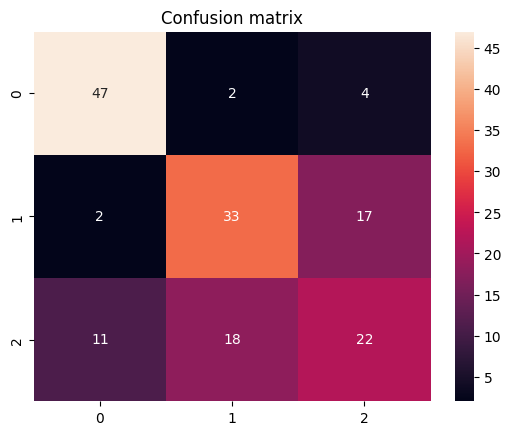

In [852]:
sns.heatmap(conf_matrix,annot=True)
plt.title("Confusion matrix")
plt.show()
